In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

import torch

In [2]:
from utils.ssd_model import SSD

voc_classes = ['aeroplane', 'bicycle', 'bird', 'boat',
               'bottle', 'bus', 'car', 'cat', 'chair',
               'cow', 'diningtable', 'dog', 'horse',
               'motorbike', 'person', 'pottedplant',
               'sheep', 'sofa', 'train', 'tvmonitor']

ssd_cfg = {
    'num_classes': 21,
    'input_size': 300,
    'bbox_aspect_num': [4, 6, 6, 6, 4, 4],
    'feature_maps': [38, 19, 10, 5, 3, 1],
    'steps': [8, 16, 32, 64, 100, 300],
    'min_sizes': [30, 60, 111, 162, 213, 264],
    'max_sizes': [60, 111, 162, 213, 264, 315],
    'aspect_ratios': [[2], [2, 3], [2, 3], [2, 3], [2], [2]],
}

net = SSD(phase='inference', cfg=ssd_cfg)

net_weights = torch.load('./weights/ssd300_mAP_77.43_v2.pth', map_location={'cuda:0': 'cpu'})

net.load_state_dict(net_weights)

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

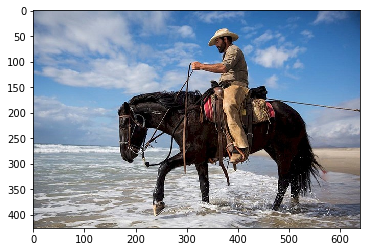

torch.Size([1, 21, 200, 5])
tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0217, 0.0143, 0.8602, 0.1342, 0.9310],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0385, 0.7289, 0.7485, 0.8518, 0.9207],
          [0.0211, 0.7424, 0.8170, 0.8265, 0.9280],
          [0.0146, 0.7626, 0.8616, 0.8466, 0.9242],
          ...,
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.00

In [3]:
from utils.ssd_model import DataTransform

path_to_img = "./data/cowboy-757575_640.jpg"
img = cv2.imread(path_to_img)
height, width, channels = img.shape

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# 前処理クラスの作成
color_mean = (104, 117, 123)
input_size = 300
transform = DataTransform(input_size, color_mean)

phase = 'val'
img_transformed, boxes, labels = transform(img, phase, "", "")
img = torch.from_numpy(img_transformed[:, :, (2, 1, 0)]).permute(2, 0, 1)

net.eval()
x = img.unsqueeze(0) # mini-batch化 torch.Size([1, 3, 300, 300])
detections = net(x)

print(detections.shape)
print(detections)

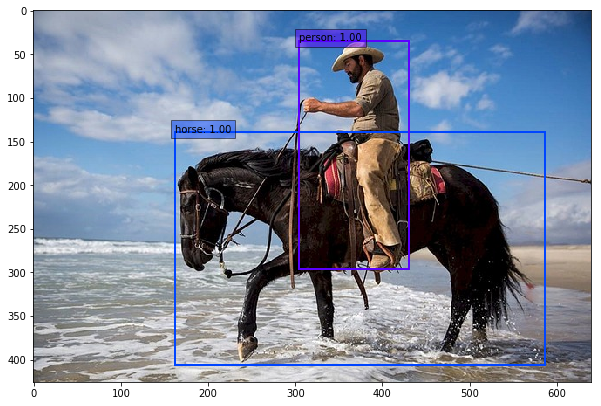

In [4]:
from utils.ssd_predict_show import SSDPredictShow

path_to_img = "./data/cowboy-757575_640.jpg"

ssd = SSDPredictShow(eval_categories=voc_classes, net=net)
ssd.show(path_to_img, data_confidence_level=0.6)

In [ ]:
t65